In [1]:
import pandas as pd
import numpy as np

pred_df = pd.read_csv("/Users/christianhellum/Cand. Merc./Data-Science-Project/data_science_project/Beat the bookies/data/df_prepro.csv", index_col=0)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Load and prepare the data
pred_df['Home'] = pred_df['Home'].astype('category')
pred_df['Away'] = pred_df['Away'].astype('category')
pred_df['FTR'] = pred_df['FTR'].astype('category')

# Ensure 'date' is in datetime format
# pred['date'] = pd.to_datetime(pred['Date'])

# Split data into train and test sets
train = pred_df[pred_df['Date'] < '2023-01-01']
test = pred_df[pred_df['Date'] >= '2023-01-01']

# Define predictors and target
X_train = train[['Home', 'Away', 'Attendance', 'B365H', 'B365D', 'B365A',
       'AvgHomePoints', 'AvgAwayPoints', 'AvgLosingHomePoints',
       'AvgLosingAwayPoints', 'AvgGoalDiffHome', 'AvgGoalDiffAway',
       'HomeWinsRatio', 'HomeDrawsRatio', 'AwayWinsRatio', 'AwayDrawsRatio', 'AvgHomeShotsLast5',
       'AvgHomeShotsOnTargetLast5', 'AvgAwayShotsLast5',
       'AvgAwayShotsOnTargetLast5', 'elo', 'elo_away', 'FormHomeTeam',
       'FormAwayTeam', 'ProbabilityHomeWin', 'ProbabilityAwayWin']]
y_train = train['FTR']
X_test = test[X_train.columns]
y_test = test['FTR']

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame to keep column labels
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [19]:
X_train = X_train.drop(['Home', 'Attendance', 'Away'], axis=1)

In [20]:
X_test = X_test.drop(['Home', 'Attendance', 'Away'], axis=1)

In [21]:
# Train the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Optionally, print the confusion matrix
print("Confusion Matrix - Training Set")
print(confusion_matrix(y_train, y_train_pred))

print("Confusion Matrix - Test Set")
print(confusion_matrix(y_test, y_test_pred))

Training Accuracy: 0.5442
Test Accuracy: 0.5526
Confusion Matrix - Training Set
[[188  42 135]
 [ 91  53 219]
 [ 64  37 461]]
Confusion Matrix - Test Set
[[ 89   4  62]
 [ 40   9  97]
 [ 41  11 217]]


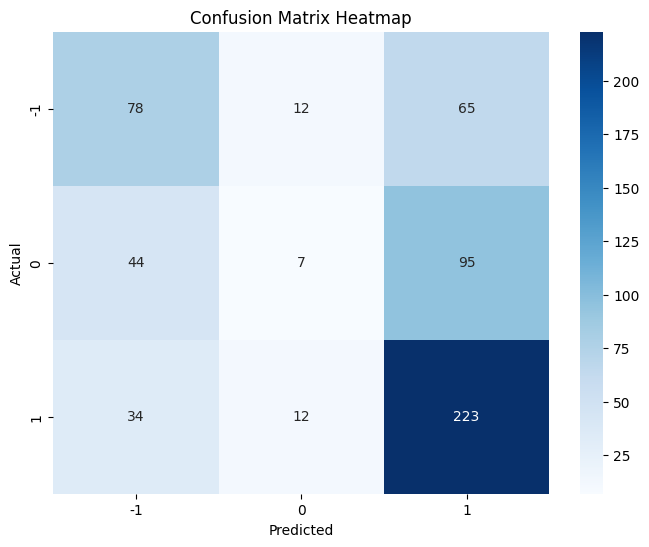

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


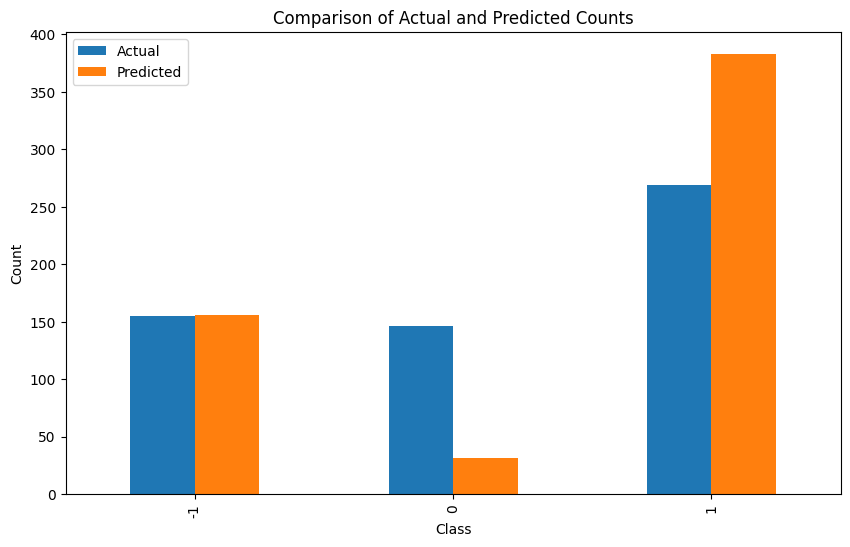

In [5]:
# Count the number of occurrences for each class in actual and predicted values
actual_counts = y_test.value_counts().sort_index()
predicted_counts = pd.Series(y_test_pred).value_counts().sort_index()

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'Actual': actual_counts, 'Predicted': predicted_counts}).fillna(0)

# Plot the comparison
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Comparison of Actual and Predicted Counts')
plt.show()


In [22]:
# Train the logistic regression model with regularization
model_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, C=0.1)
model_reg.fit(X_train, y_train)

# Make predictions
y_train_pred_reg = model_reg.predict(X_train)
y_test_pred_reg = model_reg.predict(X_test)

# Calculate accuracy
train_accuracy_reg = accuracy_score(y_train, y_train_pred_reg)
test_accuracy_reg = accuracy_score(y_test, y_test_pred_reg)

# Print the accuracies
print(f"Training Accuracy with Regularization: {train_accuracy_reg:.4f}")
print(f"Test Accuracy with Regularization: {test_accuracy_reg:.4f}")

# Print the confusion matrix
print("Confusion Matrix - Training Set with Regularization")
print(confusion_matrix(y_train, y_train_pred_reg))

print("Confusion Matrix - Test Set with Regularization")
print(confusion_matrix(y_test, y_test_pred_reg))


Training Accuracy with Regularization: 0.5450
Test Accuracy with Regularization: 0.5421
Confusion Matrix - Training Set with Regularization
[[188  29 148]
 [ 88  46 229]
 [ 63  30 469]]
Confusion Matrix - Test Set with Regularization
[[ 84   3  68]
 [ 40   6 100]
 [ 40  10 219]]


In [13]:
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Apply Ridge Regression for feature selection
ridge = Ridge(alpha=0.00001)
ridge.fit(X_train, y_train.cat.codes)  # Convert y_train to numerical values for Ridge regression

# Get the coefficients and sort them by absolute value
coef = pd.Series(ridge.coef_, index=X_train.columns)
important_features = coef[coef.abs() > 0.1].index  # Keep features with coefficients above a threshold

print("Selected Features:")
print(important_features)

# Select important features for the logistic regression model
X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]

Selected Features:
Index(['B365H', 'B365A', 'elo', 'elo_away', 'ProbabilityHomeWin',
       'ProbabilityAwayWin'],
      dtype='object')


In [23]:
# Train the logistic regression model with selected features
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train_selected, y_train)

# Make predictions
y_train_pred = model.predict(X_train_selected)
y_test_pred = model.predict(X_test_selected)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Print the confusion matrix
print("Confusion Matrix - Training Set")
print(confusion_matrix(y_train, y_train_pred))

print("Confusion Matrix - Test Set")
print(confusion_matrix(y_test, y_test_pred))


Training Accuracy: 0.5271
Test Accuracy: 0.5526
Confusion Matrix - Training Set
[[195  10 160]
 [101   8 254]
 [ 79   6 477]]
Confusion Matrix - Test Set
[[ 82   6  67]
 [ 40   4 102]
 [ 33   7 229]]
